In [1]:
# A copy of Basic Connectome Simulations, but edited to be nicer.
# Also added the final functionalities of Skeleton Pipeline

# First Import the packages.
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

INFO  log level set to INFO


In [2]:
# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(r"C:\Users\Pok Him\Desktop\4mouse.zip")

# Mouse Allen Connectivity
#con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

WARNING  File 'hemispheres' not found in ZIP.


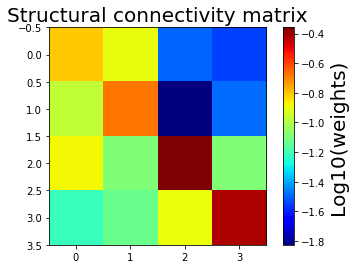

In [3]:
# Visualize the structural connectivity matrix
plt.subplots()
cs=plt.imshow(np.log10(con.weights), cmap='jet', aspect='equal', interpolation='none')
plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)
#plt.yticks([0,1,2,3])

In [4]:
# Set the parameter of the resting state simulation
sim = simulator.Simulator(model=models.WilsonCowan(),
                        connectivity=con,
                        coupling=coupling.Linear(a=0.096),
                        integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=0.000013)),
                        monitors=(monitors.Bold(period=2e3),
                                  monitors.TemporalAverage(period=1e3)),
                        simulation_length=1.2e5).configure()
# Run the resting state simulation
(bold_time, bold_data), _ = sim.run()

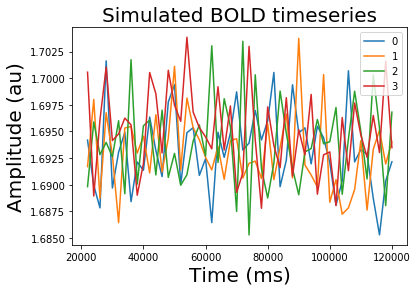

In [10]:
# Display the simulated bold timeseries
plt.subplots()
plt.plot(bold_time[10:],bold_data[10:,0,:,0])
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated BOLD timeseries', fontsize=20)
plt.legend(('0','1','2','3'))


## Analysis

The simulated BOLD signals can be analyzed in different way. 

### Functional Connectivity Matrix

Let's just do a static one


In [11]:
# Functional Connectivity Matrix. 

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
Snip = 10 

# Convert Simulation output into a form usable by Numpy.
TSeriesMatrix = np.empty((bold_data.shape[2], bold_data.shape[0]-Snip))
#Matrix = []

for i in range(bold_data.shape[2]):
    TSeriesMatrix[i] = bold_data[Snip:,0,i].flatten()

# Functional Conenctivity MAtrix = Pearson Correlation.

FCM = np.corrcoef(TSeriesMatrix)
FCM

array([[ 1.        ,  0.1398022 , -0.33078267,  0.14335613],
       [ 0.1398022 ,  1.        , -0.12659723,  0.21571144],
       [-0.33078267, -0.12659723,  1.        , -0.29621734],
       [ 0.14335613,  0.21571144, -0.29621734,  1.        ]])

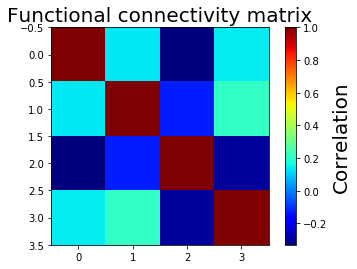

In [12]:
# Plot Matrix
cs=plt.imshow(FCM, cmap='jet', aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])

In [ ]:
# Comparing SC Vs FC with Spearman Correlation

In [11]:
# Write Code to export the simulation to csv.
np.savetxt("do-not-track\TSeriesMatrix.csv", TSeriesMatrix, delimiter=",")
np.savetxt("do-not-track\Bold_Time.csv", bold_time, delimiter = ",")